# Author :- Parvesh Gupta

## Task 1:- Prediction using Supervised Learning

## Grip @ Spark Foundation

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

### Import some Technical Libaries for our Task

In [2]:
# Here we use import os for change directory for getting file
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
path = 'D:\\NPTEL Python pandas\\Spark foundation tasks\\task1'
os.chdir(path) # Change working directory using chdir command

In [3]:
# Loading data using pandas
scores = pd.read_csv('student_score.csv')
print('Data Loading succesfully')
scores.head(10) # Here we look our first 10 data points

Data Loading succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Check the shape of data
scores.shape

(25, 2)

In [5]:
# Get information of data like type of data and null values
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Describe the data in statistical term 
scores.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

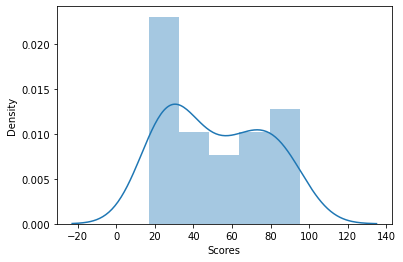

In [7]:
# checking distribution of our data using seaborn library
sns.distplot(scores['Scores'],bins = 5,kde = True)

### Input Data Visualization

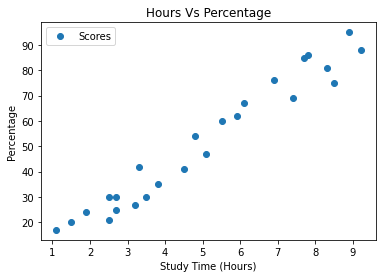

In [8]:
scores.plot(x= 'Hours',y = 'Scores',style = 'o')
plt.title('Hours Vs Percentage')
plt.xlabel('Study Time (Hours)')
plt.ylabel('Percentage')
plt.show()

In [9]:
# Assign independent value and dependent values
X = scores.drop('Scores',axis = 1)
y = scores['Scores']

Here we spliting data into Training data and Testing data. And Then Learn the model

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 5)
print('The shape of X_train:-',X_train.shape)
print('The shape of y_train:-',y_train.shape)
print('The shape of X_test:-',X_test.shape)
print('The shape of y_ttest:-',y_test.shape)

The shape of X_train:- (20, 1)
The shape of y_train:- (20,)
The shape of X_test:- (5, 1)
The shape of y_ttest:- (5,)


In [12]:
# Above we have import Linear Regression libary 
regression = LinearRegression()
student_score = regression.fit(X_train,y_train)
print('Training Model Complete')
print('The cofficent of model is:-',student_score.coef_)
print('The intercept of model is:-',student_score.intercept_)

Training Model Complete
The cofficent of model is:- [9.60498629]
The intercept of model is:- 3.0980408893375113


In [13]:
LinearRegression(copy_X = True,normalize = False,n_jobs = None,fit_intercept = True)

LinearRegression()

### Comapring Actual Values with Predicted value

In [14]:
# Using Predict function Test our model
score_predict = student_score.predict(X_test)
# comparng test result and true value
df = pd.DataFrame({'Actual':y_test,'Predicted':score_predict})
print(df)

    Actual  Predicted
19      69  74.174939
18      67  61.688457
2       27  33.833997
10      85  77.056435
21      54  49.201975


Text(0, 0.5, 'Percentage')

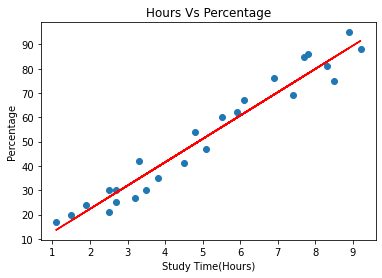

In [15]:
# plotting graph with linear equation
line = student_score.coef_*X+student_score.intercept_ # Linear Equation
plt.scatter(X,y)
plt.plot(X,line,color = 'red')
plt.title('Hours Vs Percentage')
plt.xlabel('Study Time(Hours)')
plt.ylabel('Percentage')

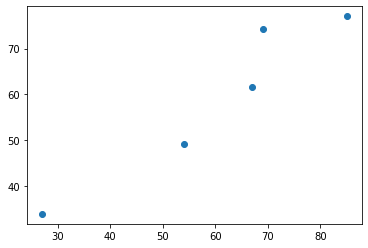

In [16]:
# Scatter plot between actual value and prediction value
plt.scatter(y_test,score_predict)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

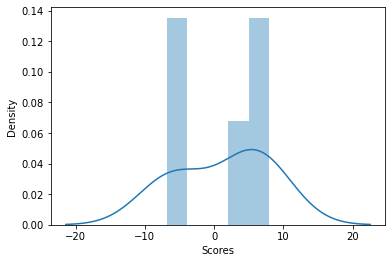

In [17]:
sns.distplot((y_test-score_predict),bins = 5) #check our out distribution

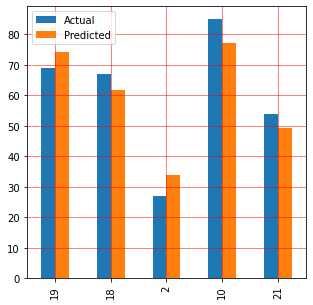

In [18]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [23]:
# Finding Scores 
print('Training Score:-',regression.score(X_train,y_train)*100)
print('Test Score:-',regression.score(X_test,y_test)*100)

Training Score:- 95.83509805345388
Test Score:- 90.00546706590146


In [25]:
# Testing the model with our own data 
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_prediction = regression.predict(test)
print('Number of hours = {}'.format(hours))
print('Predicted Socre = {}'.format(own_prediction[0]))

Number of hours = 9.25
Predicted Socre = 91.94416404722054


### Evaluate Model

In [27]:
from sklearn import metrics
print('Mean Absolute Error:-',metrics.mean_absolute_error(y_test,score_predict))
print('Mean Squared Error:-',metrics.mean_squared_error(y_test,score_predict))
print('Root Mean Squared Error:-',np.sqrt(metrics.mean_squared_error(y_test,score_predict)))
print('R-2:-',metrics.r2_score(y_test,score_predict))


Mean Absolute Error:- 6.012413762390567
Mean Squared Error:- 37.56345257951597
Root Mean Squared Error:- 6.1289030486308045
R-2:- 0.9000546706590146


### Conclusion

### Succesfully able to predict Scores of students by using Supervised Machine Learning

### Thankyou